# Dados IDH EUA
Queremos fazer uma ánalise dos dados do IDH para ver e há alguma interação com as votações dos EUA.
Pegando os dados de outros Notebooks e dos anteriormente comentados, podemos ter as seguintes conclusões:

In [1]:
# Importação das bibliotecas necessárias para a análise:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
idh = pd.read_csv('./data/GDL-Sub-national-HDI-data.csv')
idh.head()

,Country,ISO_Code,Level,GDLCODE,Region,2018
0,United States,USA,National,USAt,Total,0.920
1,United States,USA,Subnat,USAr101,Alabama,0.877
2,United States,USA,Subnat,USAr102,Alaska,0.937
3,United States,USA,Subnat,USAr103,Arizona,0.908
4,United States,USA,Subnat,USAr104,Arkansas,0.877


In [3]:
candidates = pd.read_csv('./data/candidate_per_state.csv')
candidates.head()

,Unnamed: 0,state,candidate,party,total_state
0,0,Delaware,Joe Biden,DEM,296268
1,1,Delaware,Donald Trump,REP,200603
2,2,Delaware,Jo Jorgensen,LIB,5000
3,3,Delaware,Howie Hawkins,GRN,2139
4,12,District of Columbia,Joe Biden,DEM,285728


In [4]:
candidates.shape

(349, 5)

In [5]:
# Remoção do total
idh[1:].head()

,Country,ISO_Code,Level,GDLCODE,Region,2018
1,United States,USA,Subnat,USAr101,Alabama,0.877
2,United States,USA,Subnat,USAr102,Alaska,0.937
3,United States,USA,Subnat,USAr103,Arizona,0.908
4,United States,USA,Subnat,USAr104,Arkansas,0.877
5,United States,USA,Subnat,USAr105,California,0.930


In [6]:
new_idh = idh[1:]

In [7]:
new_idh = idh[1:]

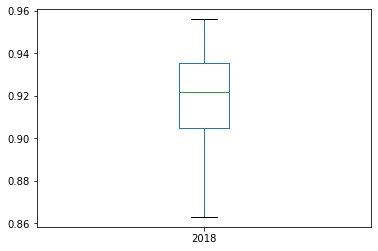

In [8]:
new_idh.boxplot(grid=False)

[Text(0, 0.5, ''), Text(0.5, 0, '2018'), Text(0.5, 1.0, 'IDH EUA')]

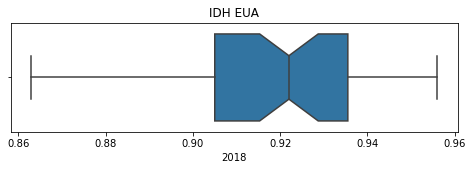

In [9]:
fig = plt.subplots(figsize=(8, 2))
ax = srn.boxplot(x=new_idh['2018'], notch=True)
ax.set(title='IDH EUA', xlabel='2018', ylabel='')

Text(0.5, 0, '2018')

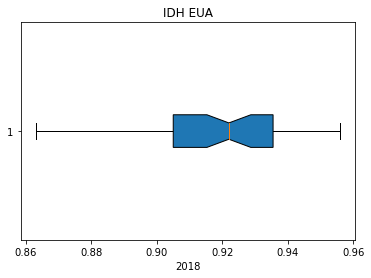

In [10]:
plt.boxplot(new_idh['2018'], vert=False, showfliers = False, notch = True,patch_artist = True)
plt.title('IDH EUA')
plt.xlabel('2018')

## Aqui conferimos que quando recuperados pelo mesmo nome, retornam os mesmo índices:

In [11]:
values = []
for i in candidates.state:
    values.append(new_idh.loc[new_idh.Region == i]['Region'].values[0])
len(values)

349

In [12]:
# Então adicionaremos esses itens aos respectivos itens na tabela
values = []
for i in candidates.state:
    values.append(new_idh.loc[new_idh.Region == i]['2018'].values)

idh_per_state = pd.DataFrame(values, columns=['IDH'])
candidates = candidates.join(idh_per_state)
candidates.head()

,Unnamed: 0,state,candidate,party,total_state,IDH
0,0,Delaware,Joe Biden,DEM,296268,0.930
1,1,Delaware,Donald Trump,REP,200603,0.930
2,2,Delaware,Jo Jorgensen,LIB,5000,0.930
3,3,Delaware,Howie Hawkins,GRN,2139,0.930
4,12,District of Columbia,Joe Biden,DEM,285728,0.942


Iremos testar se os dados que adicionamos à tabela de candidatos está corretamente ajustada

In [13]:
for i in range(len(candidates.state)):
    equal = new_idh.loc[new_idh.Region == candidates.state[i]]['2018'].values[0] == candidates.IDH[i]
    if not equal:
        print('Erro na sincronização dos dados')

## Agora que colocamos os valores de IDH junto aos valores de votos, precisamos:

* Separar os dados de maiores IDHs e identificar quem ganhou em cada estado com maiores IDHs
* Depois continuar e analisar todos para saber se há alguma importância de IDHna votação

In [14]:
joe_donald = candidates.loc[(candidates.candidate == 'Joe Biden') | (candidates.candidate == 'Donald Trump')]
joe_donald.head()

,Unnamed: 0,state,candidate,party,total_state,IDH
0,0,Delaware,Joe Biden,DEM,296268,0.930
1,1,Delaware,Donald Trump,REP,200603,0.930
4,12,District of Columbia,Joe Biden,DEM,285728,0.942
5,13,District of Columbia,Donald Trump,REP,16306,0.942
11,68,Florida,Joe Biden,DEM,5294767,0.909


In [15]:
joe_biden = candidates.loc[candidates.candidate == 'Joe Biden'].drop(['party'], axis=1)
donald_trump = candidates.loc[candidates.candidate == 'Donald Trump'].drop(['party'], axis=1)   

In [16]:
donald_trump.head()

,Unnamed: 0,state,candidate,total_state,IDH
1,1,Delaware,Donald Trump,200603,0.930
5,13,District of Columbia,Donald Trump,16306,0.942
12,69,Florida,Donald Trump,5667474,0.909
19,590,Georgia,Donald Trump,2458010,0.902
24,1087,Hawaii,Donald Trump,196800,0.940


In [17]:
joe_biden.head()

,Unnamed: 0,state,candidate,total_state,IDH
0,0,Delaware,Joe Biden,296268,0.930
4,12,District of Columbia,Joe Biden,285728,0.942
11,68,Florida,Joe Biden,5294767,0.909
20,591,Georgia,Joe Biden,2472182,0.902
23,1086,Hawaii,Joe Biden,366070,0.940


In [18]:
test_joe = joe_biden.reset_index()
test_donaldo = donald_trump.reset_index()
won_lost = np.where(test_joe['total_state'] > test_donaldo['total_state'], 'Won', 'Lost')
won_lost

array(['Won', 'Won', 'Lost', 'Won', 'Won', 'Lost', 'Won', 'Lost', 'Lost',
       'Lost', 'Lost', 'Lost', 'Won', 'Won', 'Won', 'Won', 'Won', 'Lost',
       'Lost', 'Lost', 'Lost', 'Won', 'Won', 'Won', 'Won', 'Won', 'Lost',
       'Lost', 'Lost', 'Lost', 'Won', 'Won', 'Won', 'Lost', 'Lost',
       'Lost', 'Lost', 'Lost', 'Won', 'Won', 'Won', 'Lost', 'Won', 'Lost',
       'Lost', 'Lost', 'Lost', 'Won', 'Won', 'Won', 'Won'], dtype='<U4')

In [19]:
joe_biden['result'] = won_lost

In [20]:
joe_biden.head()

,Unnamed: 0,state,candidate,total_state,IDH,result
0,0,Delaware,Joe Biden,296268,0.930,Won
4,12,District of Columbia,Joe Biden,285728,0.942,Won
11,68,Florida,Joe Biden,5294767,0.909,Lost
20,591,Georgia,Joe Biden,2472182,0.902,Won
23,1086,Hawaii,Joe Biden,366070,0.940,Won


In [21]:
joe_biden.sort_values('IDH', ascending=False).head()

,Unnamed: 0,state,candidate,total_state,IDH,result
92,8308,Massachusetts,Joe Biden,2271849,0.956,Won
340,30248,Connecticut,Joe Biden,1079174,0.953,Won
105,10622,Minnesota,Joe Biden,1718739,0.947,Won
144,13485,New Hampshire,Joe Biden,424937,0.943,Won
147,14432,New Jersey,Joe Biden,2389584,0.943,Won


In [22]:
len(joe_biden.loc[joe_biden.result == 'Won'])

26

Text(21.375, 0.5, '')

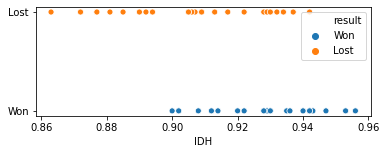

In [109]:
# Gráfico de dispersão utilizando os atributos conc e uptake, agrupamento pelo type
fig, ax = plt.subplots(figsize=(6, 2))
srn.scatterplot(joe_biden.IDH, joe_biden.result, hue=joe_biden.result, ax=ax)
plt.savefig('distplot_joe.png')
ax.set_ylabel('')

## Antes de continuarmos, é importante entendermos o conceito de IDH e aplicar aos dados que teremos.
Segundo a famosa Wikipedia:
> Indice de Desenvolvimento Humano é a medida comparativa usada para classificar os países pelo seu grau de desenvolvimento humano.
> Categorizando assim um país Desenvolvido e um Subdesenvolvido.

A estatística aqui é medida com os seguintes índices:
* Expectativa de vida ao nascer
* Educação
* PIB

Também explicado no mesmo Site:
> O IDH também é usado por organizações locais para medir o desenvolvimento de entidades subnacionais, como estados {...}

Esse último sendo o nosso caso.

É importante expor que o IDH é amplamente criticado. São valores já redundantes que pouco resolvem os acontecimentos reais e não mostra realmente como um país está quando se trata do real "Desenvolvimento Humano".
<br>Um exemplo forte disso é a Arabia Saudita, com um IDH alto. Sabemos que tem uma alta renda, mas falha muito na questão educação e saúde. Isso deixa explicíto que os dados acabam sendo pendentes para grupos dentro de um país ou estado.

Mesmo tendo em vista esses dados, o IDH pode, como é, ser usado como "mediadores" políticos. O que significa que pode ser usado como uma arma: "Se for alta {...} pode ser facilmente usado como um meio de engrandecimento nacional, alternativamente, se baixa, ela pode ser utilizada para destacar as insuficiências nacionais". Podendo ser aplicada para diversos jogos políticos, incluindo entre nações.

Text(0.5, 1.0, 'Distribuição do IDH (Ganho)')

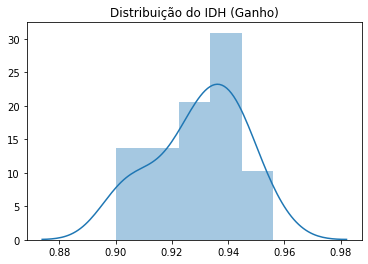

In [110]:
# Plot da distribuição de IDH quando ganhou
ax_won = srn.distplot(joe_biden.IDH.loc[joe_biden.result == 'Won'], bins = 5, axlabel = '')
ax_won.set_title('Distribuição do IDH (Ganho)')

Text(0.5, 1.0, 'Distribuição do IDH (Perda)')

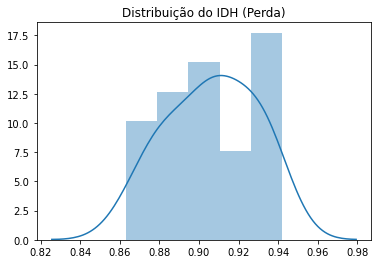

In [111]:
# Plot da distribuição de IDH quando perdeu
ax_lost = srn.distplot(joe_biden.IDH.loc[joe_biden.result == 'Lost'], bins = 5, axlabel = '')
ax_lost.set_title('Distribuição do IDH (Perda)')

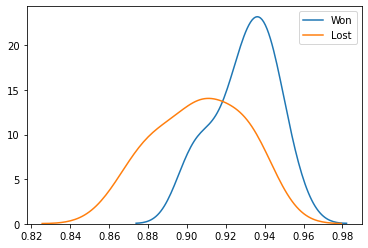

In [112]:
fig, ax = plt.subplots()
srn.distplot(joe_biden.IDH.loc[joe_biden.result == 'Won'], bins = 5, axlabel = '', hist=False, ax=ax, label='Won')
srn.distplot(joe_biden.IDH.loc[joe_biden.result == 'Lost'], bins = 5, axlabel = '', hist=False, ax=ax,label='Lost')
plt.savefig('distplot_joe_won_lost.png')
ax

Logo, vemos nesses dados que realmente os estados que obtiveram os maiores IDHs fizeram *Joe Biden* ganhar.
Não temos como chegar há um ponto totalmente conclusivo quando se trata de IDH. Porém sabemos que esses dados podem ser usados como Jogo político.